In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1 Aquisição de dados

In [2]:
dataset = pd.read_csv('iris_flower.csv')
dataset

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [3]:
X = dataset.iloc[:, [2, 3]].values
X

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.5, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

# 2 Definição do numero de clusters

C:\Users\socia\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


550.6434666666668
86.40394533571005
31.387758974358974
19.499400899685114
14.084349656750573
11.07941480094615
9.514800341130604
8.27823823689659
6.8327306680247855


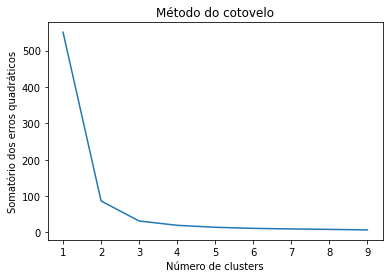

In [4]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'random', random_state = 42)
    kmeans.fit(X)
    print(kmeans.inertia_)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('Método do cotovelo')
plt.xlabel('Número de clusters')
plt.ylabel('Somatório dos erros quadráticos')
plt.show()

# 3 Treinando o modelo

In [5]:
kmeans = KMeans(n_clusters = 5, init = 'random', n_init = 100)
y_kmeans = kmeans.fit_predict(X)

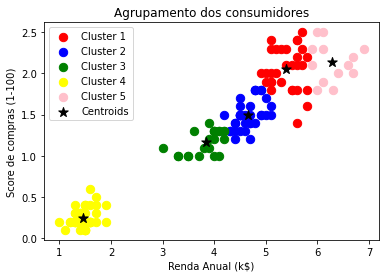

In [6]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 70, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 70, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 70, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 70, c = 'yellow', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 70, c = 'pink', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s = 100, c = 'black', label = 'Centroids')
plt.title('Agrupamento dos consumidores')
plt.xlabel('Renda Anual (k$)')
plt.ylabel('Score de compras (1-100)')
plt.legend()
plt.show()

In [7]:
kmeans = KMeans(n_clusters = 3, init = 'random', n_init = 100)
y_kmeans = kmeans.fit_predict(X)

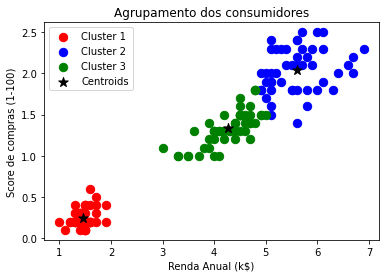

In [8]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 70, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 70, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 70, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s = 100, c = 'black', label = 'Centroids')
plt.title('Agrupamento dos consumidores')
plt.xlabel('Renda Anual (k$)')
plt.ylabel('Score de compras (1-100)')
plt.legend()
plt.show()

# 4 Treinando o modelo com kmeans++

C:\Users\socia\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


550.6434666666668
86.40394533571005
31.387758974358974
19.499400899685114
13.933308757908756
11.073657664362925
9.207570634920636
7.7264484192151315
6.530632636644402


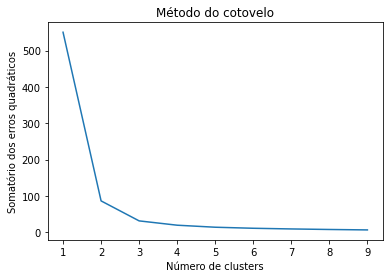

In [9]:
wcss2 = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    print(kmeans.inertia_)
    wcss2.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss2)
plt.title('Método do cotovelo')
plt.xlabel('Número de clusters')
plt.ylabel('Somatório dos erros quadráticos')
plt.show()

In [10]:
vKmeans = []
vKmeanspp = []

[[5.39666667 2.05333333]
 [1.464      0.244     ]
 [4.64857143 1.5       ]
 [3.83181818 1.16818182]
 [6.28461538 2.13846154]]


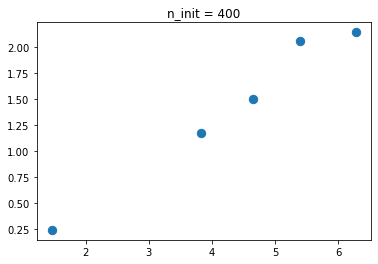

[[4.64857143 1.5       ]
 [1.464      0.244     ]
 [5.39666667 2.05333333]
 [3.83181818 1.16818182]
 [6.28461538 2.13846154]]


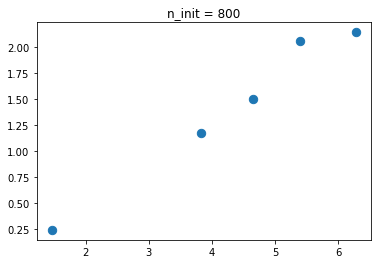

[[5.39666667 2.05333333]
 [1.464      0.244     ]
 [3.83181818 1.16818182]
 [4.64857143 1.5       ]
 [6.28461538 2.13846154]]


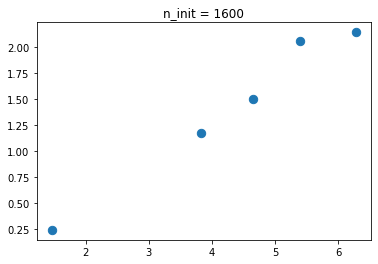

[[6.28461538 2.13846154]
 [1.464      0.244     ]
 [4.64857143 1.5       ]
 [5.39666667 2.05333333]
 [3.83181818 1.16818182]]


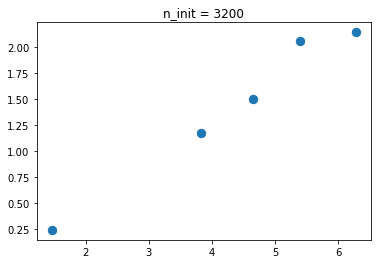

[[5.39666667 2.05333333]
 [1.464      0.244     ]
 [3.83181818 1.16818182]
 [6.28461538 2.13846154]
 [4.64857143 1.5       ]]


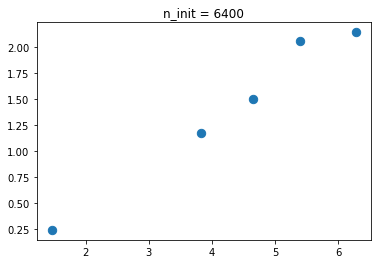

In [11]:
from sklearn.cluster import KMeans
for i in range(1, 6):
    kmeans = KMeans(n_clusters = 5, init = 'k-means++', n_init=200*2**i)
    yy_kmeans = kmeans.fit_predict(X)
    vKmeans.append(kmeans)
    print(kmeans.cluster_centers_)
    plt.title(f'n_init = {200*2**i}')
    plt.scatter(list(map(lambda x: x[0], kmeans.cluster_centers_)), list(map(lambda x: x[1], kmeans.cluster_centers_)), s = 70)
    plt.show()

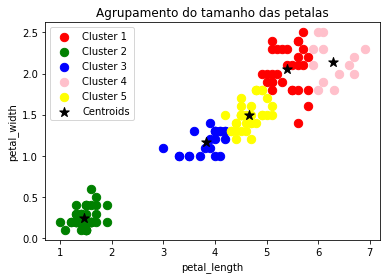

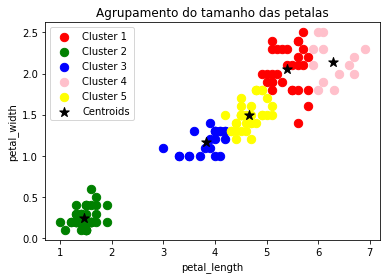

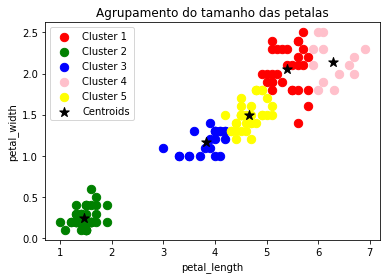

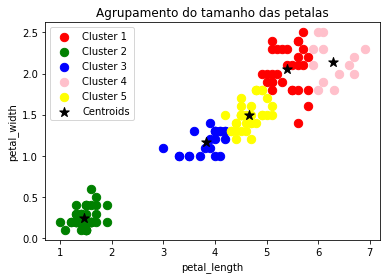

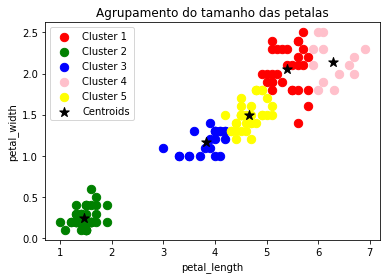

In [12]:
for kmeans in vKmeans:
    plt.scatter(X[yy_kmeans == 0, 0], X[yy_kmeans == 0, 1], s = 70, c = 'red', label = 'Cluster 1')
    plt.scatter(X[yy_kmeans == 1, 0], X[yy_kmeans == 1, 1], s = 70, c = 'green', label = 'Cluster 2')
    plt.scatter(X[yy_kmeans == 2, 0], X[yy_kmeans == 2, 1], s = 70, c = 'blue', label = 'Cluster 3')
    plt.scatter(X[yy_kmeans == 3, 0], X[yy_kmeans == 3, 1], s = 70, c = 'pink', label = 'Cluster 4')
    plt.scatter(X[yy_kmeans == 4, 0], X[yy_kmeans == 4, 1], s = 70, c = 'yellow', label = 'Cluster 5')
    
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s = 100, c = 'black', label = 'Centroids')
    plt.title('Agrupamento do tamanho das petalas')
    plt.xlabel('petal_length')
    plt.ylabel('petal_width')
    plt.legend()
    plt.show()